# Phase 3 Project

<b>Peter Burton
    
   Flatiron Data Science Live Cohort ntl-ds-live-051622
    
   Instructor: William Wang           
   Technical Coach: Daniel Burdeno   
   Due Date: 7/15/22<b>
    

In [16]:
#First step is to download download from Kaggle as a CSV file, and to start data cleaning

In [17]:
#Importing libraries for data cleaning
import pandas as pd
import numpy as np
#importing our data modeling libraries

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [18]:
df=pd.read_csv('~/Desktop/flatiron/phase_3/Project3/FlatironPhase3Project/Data/ChurnData.csv')

In [19]:
#Taking an initial look at our data to see what we have
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [20]:
#lets go ahead and one hot encode state data so that we can work with it
dummies = pd.get_dummies(df['state'], prefix='state')
df = pd.merge(
    left=df,
    right=dummies,
    left_index=True,
    right_index=True,
)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Taking a look at our file types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [22]:
#Checking for null values
df.isna().sum()

state                 0
account length        0
area code             0
phone number          0
international plan    0
                     ..
state_VT              0
state_WA              0
state_WI              0
state_WV              0
state_WY              0
Length: 72, dtype: int64

In [23]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
print(df['churn'].describe())

count      3333
unique        2
top       False
freq       2850
Name: churn, dtype: object


In [25]:
print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize=True))

False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


At a first glance at our data, it looks as if it is relatively heavily skewed/imbalanced, with 
about 86% False and 14% True.
 
.At first glance our data seems to already be relatively clean, without 
null values, missing data, or data type errors that need to be fixed

Next step will be to visualize some the relationships and form an idea about how to model the data

In [26]:
#Importing libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [27]:
df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,...,0.014912,-0.026651,-0.013148,-0.000397,0.018810,0.012627,0.003555,-0.008476,-0.025631,0.018058
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,...,0.004104,-0.006379,-0.015205,0.024545,-0.012636,0.007823,-0.000510,0.005189,0.029812,-0.001039
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,...,0.023093,-0.009857,-0.017963,0.004353,-0.011911,-0.016959,-0.036747,0.002070,0.008308,-0.017748
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,...,0.024650,-0.009345,0.004752,0.010353,-0.007147,0.006200,-0.002695,-0.001832,-0.019383,0.001115
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,...,-0.037914,0.006444,-0.003329,-0.010940,0.037767,-0.000797,0.005393,-0.028977,0.030234,0.013681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
state_VT,0.012627,0.007823,-0.016959,0.006200,-0.000797,0.006207,0.012950,-0.018353,0.012966,0.018102,...,-0.020261,-0.019022,-0.022235,-0.022235,-0.023012,1.000000,-0.021269,-0.023165,-0.027121,-0.023012
state_WA,0.003555,-0.000510,-0.036747,-0.002695,0.005393,-0.002697,0.007933,-0.031195,0.007938,-0.002323,...,-0.019244,-0.018068,-0.021120,-0.021120,-0.021858,-0.021269,1.000000,-0.022002,-0.025760,-0.021858
state_WI,-0.008476,0.005189,0.002070,-0.001832,-0.028977,-0.001839,-0.010750,-0.004475,-0.010741,-0.005028,...,-0.020959,-0.019678,-0.023002,-0.023002,-0.023805,-0.023165,-0.022002,1.000000,-0.028056,-0.023805
state_WV,-0.025631,0.029812,0.008308,-0.019383,0.030234,-0.019380,-0.044919,-0.018722,-0.044945,0.000658,...,-0.024539,-0.023039,-0.026930,-0.026930,-0.027871,-0.027121,-0.025760,-0.028056,1.000000,-0.027871


In [28]:
#state does not 

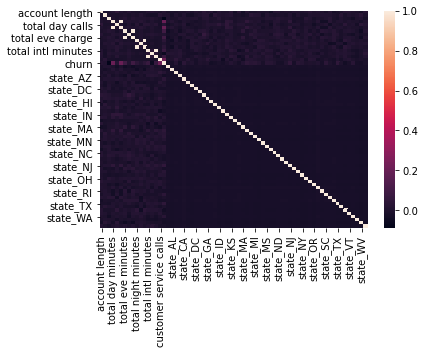

In [29]:
sns.heatmap(df.corr());

In [30]:
target_col_name = 'churn'
feature_target_corr = {}
for col in df:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(df[col], df[target_col_name])[0]
print("Feature-Target Correlations")
feature_target_corr

TypeError: unsupported operand type(s) for +: 'float' and 'str'

If we take a look at the correlations with our data and churning we can see that there appear to be 4 key tables that are highly correlated with churn:

 - State info
 - Customer Service Calls
 - Total Day Charges
 
Although each indivual peice of state data by itself doesnt have an overwhelming amount of correlation by itself, the total amount of correlation contributed by the states as a whole DOES add up to a very substantial amount. 

However, we can quickly see that Total day minutes and total day charges are representing the same data, they are correllated with each other with a coeeficient of 1! We also see that this pattern repeats with evening, night, and international minutes so for the sake of clarity we will remove one of the two replicating data from the table for each of these pairs. 


In [31]:
print(df['customer service calls'].describe())
print(df['customer service calls'].value_counts())



count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


In [32]:
print(df['total day minutes'].describe())
print(df['total day minutes'].value_counts())


count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64
174.5    8
159.5    8
154.0    8
175.4    7
162.3    7
        ..
199.9    1
105.8    1
125.6    1
179.8    1
270.8    1
Name: total day minutes, Length: 1667, dtype: int64


In [33]:
df['total day minutes'].isna().sum()

0

In [34]:
print(df['total day charge'].describe())
print(df['total day charge'].value_counts())

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64
27.12    8
26.18    8
29.67    8
31.18    7
27.59    7
        ..
19.36    1
16.95    1
34.12    1
48.35    1
13.28    1
Name: total day charge, Length: 1667, dtype: int64


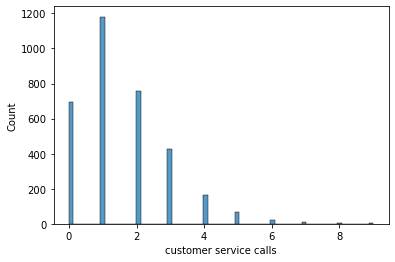

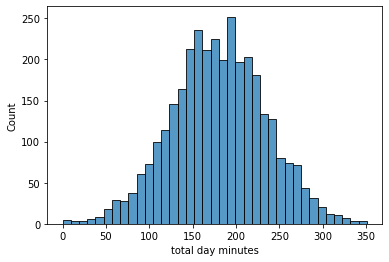

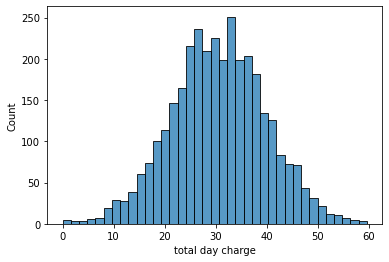

In [35]:
## Looking at our 3 key tables to see our key data
for col in['customer service calls', 'total day minutes', 'total day charge']:
    sns.histplot(df[col])
    plt.show()

Most of our key data seems to be in a normal distriution without major outliers or large tails or major issues. Customer service calls is a bit skewed but this isnt a major issue. 

Since our data is relatively clean, without major outliers or other issues we will love on to analysis and modeling.

In [36]:
#Scaling was giving me an error because of the strings in some tables. Dropping data so that I can
#fit on test_train_split. Can also Onehotencode these 5 catergories if we want. 

df.drop(columns=['state'], inplace=True)



In [37]:
df.drop(columns=['area code'], inplace=True)


In [38]:
df.drop(columns=['international plan'], inplace=True)


In [39]:
df.drop(columns=['voice mail plan'], inplace=True)

In [40]:
df.drop(columns=['phone number'], inplace=True)

In [41]:
df.drop(columns=['total day minutes'], inplace=True)

In [42]:
df.drop(columns=['total eve minutes'], inplace=True)

In [43]:
df.drop(columns=['total intl minutes'], inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day calls         3333 non-null   int64  
 3   total day charge        3333 non-null   float64
 4   total eve calls         3333 non-null   int64  
 5   total eve charge        3333 non-null   float64
 6   total night minutes     3333 non-null   float64
 7   total night calls       3333 non-null   int64  
 8   total night charge      3333 non-null   float64
 9   total intl calls        3333 non-null   int64  
 10  total intl charge       3333 non-null   float64
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   bool   
 13  state_AK                3333 non-null   uint8  
 14  state_AL                3333 non-null   

In [45]:
#importing our data modeling libraries

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

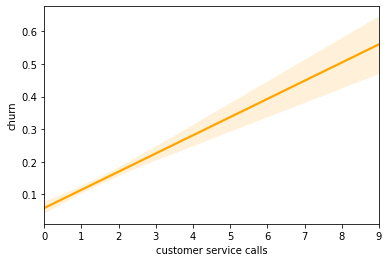

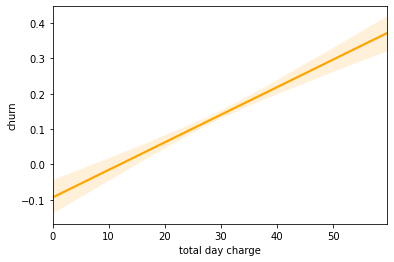

In [46]:
#taking another look at our key tables with a linear regression
for col in['customer service calls', 'total day charge']:
    sns.regplot(x=df[col], y='churn', data=df, scatter=False, line_kws={"color":"orange"})

    plt.show()

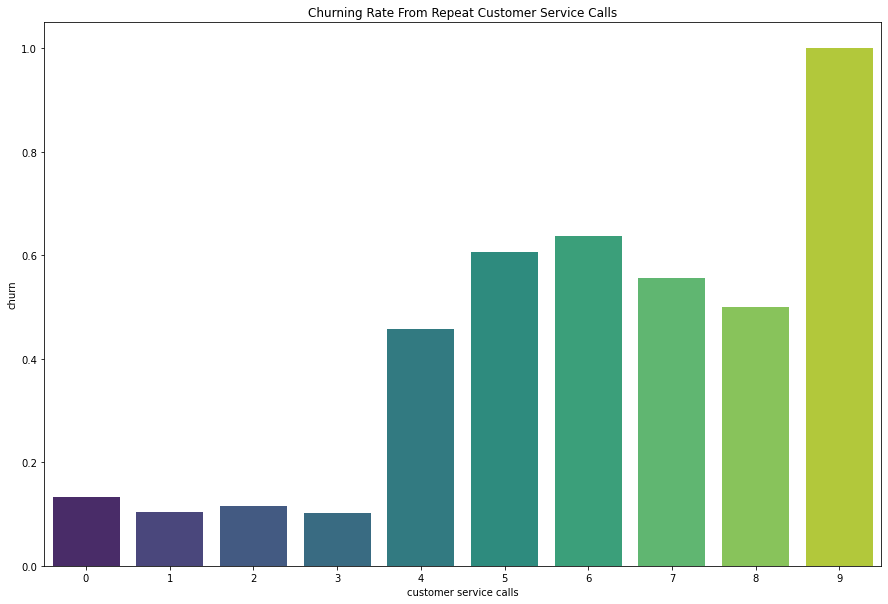

In [47]:
#Since customer service calls and churn is one of our highest correlations
# lets try to graph how repeated calls lead to churn
plt.figure(figsize=(15,10))
splot = sns.barplot(x="customer service calls", y="churn", data=df, palette = "viridis", ci=False)
plt.title("Churning Rate From Repeat Customer Service Calls")

plt.show()

# Total day Charge and Customer Churn


In [48]:
print(df['total day charge'].describe())

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64


In [49]:
bargraphdata = df.groupby("churn").sum().reset_index("churn")
bargraphdata

,churn,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,False,287262,24523,285807,84874.20,285110,48218.89,570379.6,285166,25667.31,...,52,48,54,62,72,65,52,71,96,68
1,True,49587,2471,48945,16989.97,48571,8720.55,99126.9,48493,4460.76,...,8,5,18,10,5,8,14,7,10,9


<Figure size 1296x864 with 0 Axes>

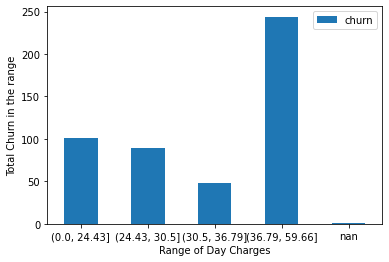

In [50]:

plt.figure(figsize=(18,12))
bins=[0,24.43, 30.5, 36.79,59.66]
data1=df.groupby([pd.cut(df['total day charge'],bins).astype(str)])[['churn']].sum().reset_index()
data1=data1.set_index('total day charge')

fig = data1.plot.bar(xlabel='Range of Day Charges', ylabel='Total Churn in the range', rot=0)

plt.show()

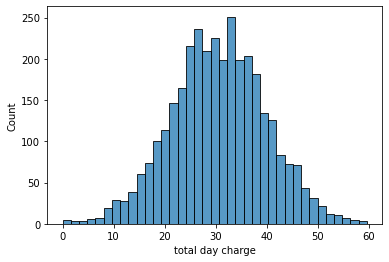

In [51]:
sns.histplot(df['total day charge'])

plt.show()

# State data and Churn

In [52]:
df_state = pd.read_csv('~/Desktop/flatiron/phase_3/Project3/FlatironPhase3Project/Data/ChurnData.csv')
statechurnrate = df_state.groupby('state')['churn'].value_counts(normalize=True)
statechurnrate_df = pd.DataFrame(statechurnrate)
statechurnrate_df.columns = ['value']
statechurnrate_df = statechurnrate_df.reset_index()

In [53]:
statechurnrate_df.head(20)

,state,churn,value
0,AK,False,0.942308
1,AK,True,0.057692
2,AL,False,0.900000
3,AL,True,0.100000
4,AR,False,0.800000
5,AR,True,0.200000
6,AZ,False,0.937500
7,AZ,True,0.062500
8,CA,False,0.735294
9,CA,True,0.264706


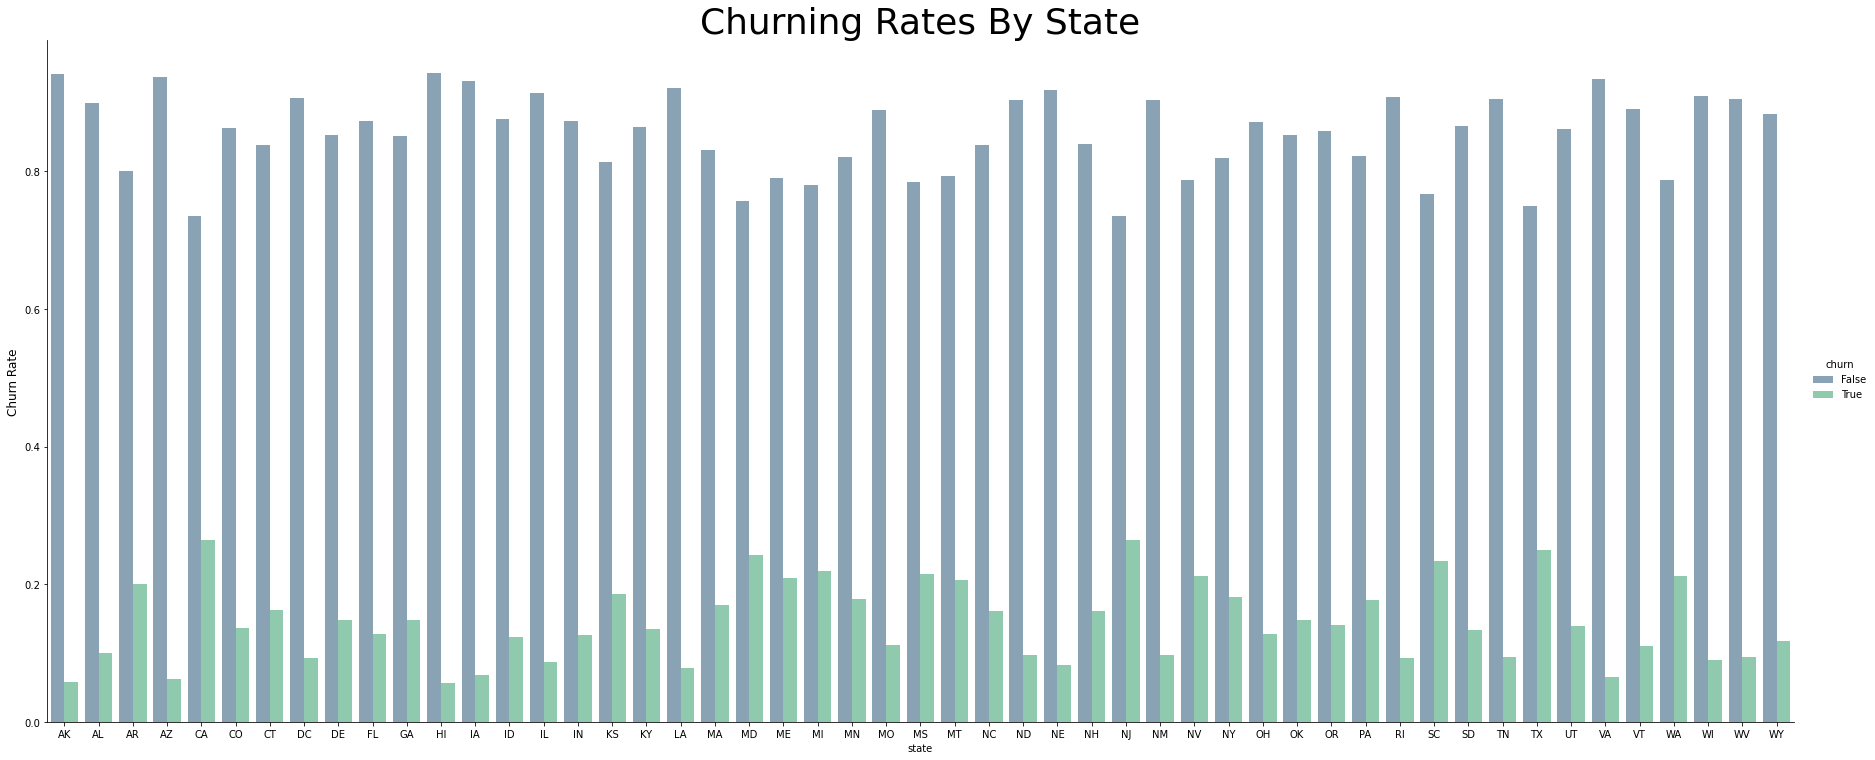

In [54]:
sns.catplot(data=statechurnrate_df, kind='bar',
            x='state', y='value', hue='churn',
            palette = "viridis", alpha=.6, height=10, aspect=2.5)
plt.title("Churning Rates By State", fontsize=36)
plt.ylabel('Churn Rate', fontsize=12)

plt.show()

# Modeling Data

Next step is to decide what data to use from our data set. Since we have identified two key features lets start with a initial df for modeling that uses just those features and churn. 

In [55]:
df1 = df[['churn', 'total day charge', 'customer service calls']]
df1.head()

,churn,total day charge,customer service calls
0,False,45.07,1
1,False,27.47,1
2,False,41.38,0
3,False,50.90,2
4,False,28.34,3


In [56]:
#first step is to run a train/test split on the data
X= df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#SMOTE oversample to correct for imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

Next step is to decide what data to use from our data set. Since we have identified 

In [58]:
#scaling data

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [59]:
y_train.value_counts(normalize=True)

True     0.5
False    0.5
Name: churn, dtype: float64

We have a very imbalanced data set, with 86% of the data being false and just 14% true. We should consider methods to deal with this.

In this case a Baseline model would simply return the common class each time, in this case false, and would be accurate 86% of the time.

# Dummy Classifier

In [60]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

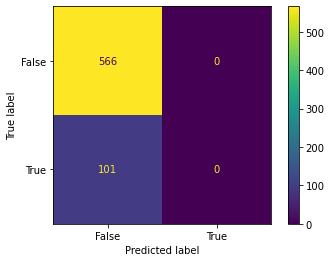

In [61]:
plot_confusion_matrix(dummy, X_test, y_test)

Our Dummy regresser did not do so great. Although it correctly predicted the outcome with an accuracy of 566/667, since it predicted false each time, it had a recall of ZERO, which is our key metric. 

In [62]:
#logisitic regresion model
logreg = LogisticRegression(random_state=42)
logreg.fit(X=X_train_scaled, y=y_train)

LogisticRegression(random_state=42)

In [63]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, {'penalty': ['l2', 'none'],'C':[.01,.1,1,10,100]})
lineargrid = clf.fit(X_train_scaled, y_train)




C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Peter\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Peter\anaconda3\envs\learn

In [64]:
lineargrid.best_params_

{'C': 10, 'penalty': 'l2'}

In [65]:
lineargrid.best_scores_

AttributeError: 'GridSearchCV' object has no attribute 'best_scores_'

In [ ]:
#confusion matrix for training data
confusion1 = plot_confusion_matrix(estimator=logreg, X=X_train_scaled, y_true=y_train);

In [ ]:
#confusion matrix for testing data
confusion2 = plot_confusion_matrix(estimator=logreg, X=X_test_scaled, y_true=y_test);

In [66]:
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = 2 * (precision * recall) / (precision + recall)
print(f'The Accuracy of our model is: {accuracy}')
print(f'The Precision of our model is: {precision}')
print(f'The Recall of our model is: {recall}')
print(f'The f1score of our model is: {f1score}')

The Accuracy of our model is: 0.8545727136431784
The Precision of our model is: 0.6428571428571429
The Recall of our model is: 0.0891089108910891
The f1score of our model is: 0.15652173913043477


As we can see, the recall of our model is VERY low. This is likely because we have such a small and skewed sample size. 

In [67]:
probability = logreg.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test, probability)

0.7602421019487108

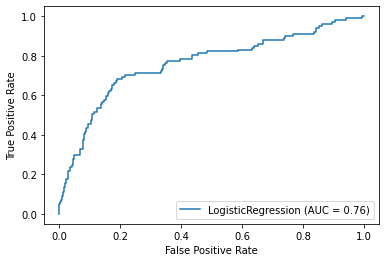

In [68]:
plot_roc_curve(logreg, X_test_scaled, y_test);


Our logisitic regression model seems to be about the same as our baseline mode, with an accuracy of roughly 85%. Lets set up a Decision tree model and see if we can do better. 

In [69]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

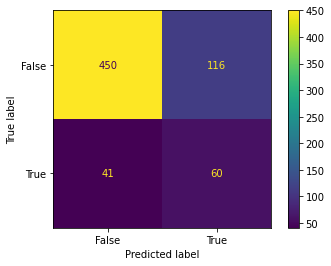

In [70]:
# Next plotting a confusion maxtrix on test data for decision tree
plot_confusion_matrix(dt, X_test_scaled, y_test)

In [71]:
y_preddt = dt.predict(X_test_scaled)
accuracydt = accuracy_score(y_test, y_preddt)
precisiondt = precision_score(y_test, y_preddt)
recalldt = recall_score(y_test, y_preddt)
f1scoredt = 2 * (precisiondt * recalldt) / (precisiondt + recalldt)
print(f'The Accuracy of our model is: {accuracydt}')
print(f'The Precision of our model is: {precisiondt}')
print(f'The Recall of our model is: {recalldt}')
print(f'The f1score of our model is: {f1scoredt}')

The Accuracy of our model is: 0.7646176911544228
The Precision of our model is: 0.3409090909090909
The Recall of our model is: 0.594059405940594
The f1score of our model is: 0.43321299638989164


Lets compare the ROC curves to see which model is doing better:

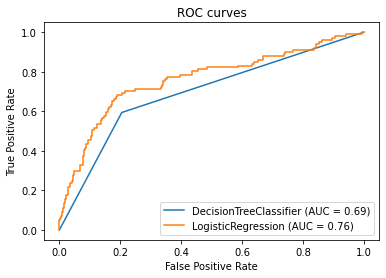

In [78]:

fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("ROC curves")
plt.show()

# Gradient 

In [79]:
GBC=GradientBoostingClassifier(random_state=42)

Gradient_parameters = {
    "learning_rate": [.0001,.00005.001],
    "min_samples_split": [4,5,8,10],
    "min_samples_leaf": [2,3,4],
    "max_depth":[8,10,12,15],
    "max_features":["log2","sqrt"],
    "subsample":[.75,0.8,.85],
    "n_estimators":[100,200,500]
    }


SyntaxError: invalid syntax (<ipython-input-79-389d8e4c8182>, line 4)

In [ ]:
Gradient_gridsearch = GridSearchCV(GBC, Gradient_parameters, cv=5, n_jobs=-1, scoring='recall', verbose=1)
Gradient_search = Gradient_gridsearch.fit(X_train, y_train)

In [ ]:
Gradient_search.best_params_

In [ ]:
Gradient_search.best_score_

# Random Forest

In [ ]:
RF=RandomForestClassifier(random_state=42)

rfgrid = { 
    'n_estimators': [200, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
RF_gridsearch = GridSearchCV(estimator=RF, param_grid=rfgrid, cv= 5,scoring='recall', verbose=1)
RF_Search =RF_gridsearch.fit(X_train, y_train)

In [ ]:
RF_Search.best_params_

In [ ]:
RF_Search.best_score_

# K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn_range = list(range(1, 27))
kgrid = dict(n_neighbors=knn_range)
  
KNN_gridsearch = GridSearchCV(knn, kgrid, cv=10, scoring='recall',  verbose=1)
  

KNN_search=KNN_gridsearch.fit(X_train, y_train)

In [ ]:
KNN_search.best_params_

In [ ]:
KNN_search.best_score_

# Best Models

After tweaking paramaters and adding back in different feature classes, the best models appear to be Gradient Boosting and the K Nearest Neighbor Models. Next Step is to run those two models on our test data and see how they perform.

In [ ]:
knnt = KNeighborsClassifier(n_neighbors=3)
knntest = knnt.fit(X_test, y_test)
y_pred = knnt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = 2 * (precision * recall) / (precision + recall)
print(f'The Accuracy of our model is: {accuracy}')
print(f'The Precision of our model is: {precision}')
print(f'The Recall of our model is: {recall}')
print(f'The f1score of our model is: {f1score}')

In [ ]:
GBCT=GradientBoostingClassifier(n_estimators=500, learning_rate=.001, max_depth=15, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, subsample= 0.8)
gbctest = GBCT.fit(X_train, y_train)
y_pred = gbctest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = 2 * (precision * recall) / (precision + recall)
print(f'The Accuracy of our model is: {accuracy}')
print(f'The Precision of our model is: {precision}')
print(f'The Recall of our model is: {recall}')
print(f'The f1score of our model is: {f1score}')

In [ ]:
gbc__feature_importances = gbctest.feature_importances_
gbc__feature_importances
for a,b in enumerate(gbc__feature_importances):
	print('Feature: %0d, Score: %.5f' % (a,b))

In [ ]:
X_train.info()

GBC is our best model by far of the two on the test class, KNN was overfit much more. Clearly our most important feature in this model seems to be total day charge. Howver, we can also see that features such as voicemail messages, international calls, customer service calls, evening/night calls, and to a lesser exten state data are major factors

SyntaxError: invalid syntax (<ipython-input-81-619527d3b0e5>, line 1)